In [1]:
#Librerias iniciales

In [2]:
import numpy as np
import keras
from keras import layers

In [3]:
# Parametros del modelo y clases
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
# Carga de los datos
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [11]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [12]:
x_train [1].shape

(28, 28)

In [13]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
y_train.shape

(60000,)

In [16]:
x_test.shape

(10000, 28, 28, 1)

In [17]:
y_test.shape

(10000,)

In [18]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [19]:
y_train_cat.shape

(60000, 10)

In [20]:
y_test_cat.shape

(10000, 10)

In [21]:
import matplotlib.pyplot as plt

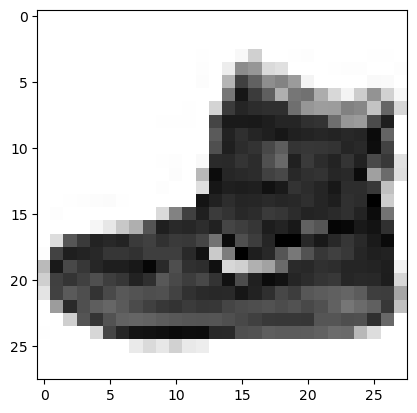

In [22]:
plt.imshow(x_train[0], cmap='Greys')

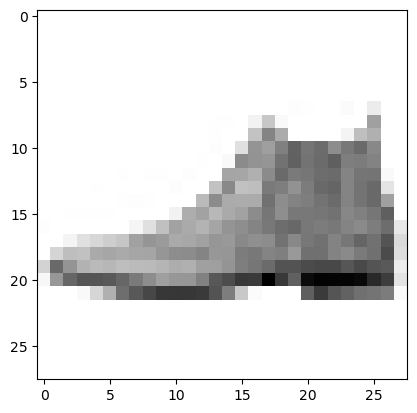

In [23]:
plt.imshow(x_test[0], cmap='Greys')

In [24]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [30]:
batch_size = 152
epochs = 27

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/27


356/356 [==============================] - 10s 26ms/step - loss: 0.7067 - accuracy: 0.7452 - val_loss: 0.4417 - val_accuracy: 0.8452
Epoch 2/27
356/356 [==============================] - 10s 27ms/step - loss: 0.4543 - accuracy: 0.8371 - val_loss: 0.3900 - val_accuracy: 0.8592
Epoch 3/27
356/356 [==============================] - 10s 28ms/step - loss: 0.4057 - accuracy: 0.8545 - val_loss: 0.3514 - val_accuracy: 0.8727
Epoch 4/27
356/356 [==============================] - 10s 27ms/step - loss: 0.3750 - accuracy: 0.8656 - val_loss: 0.3314 - val_accuracy: 0.8803
Epoch 5/27
356/356 [==============================] - 10s 27ms/step - loss: 0.3551 - accuracy: 0.8739 - val_loss: 0.3202 - val_accuracy: 0.8818
Epoch 6/27
356/356 [==============================] - 10s 28ms/step - loss: 0.3391 - accuracy: 0.8786 - val_loss: 0.3102 - val_accuracy: 0.8865
Epoch 7/27
356/356 [==============================] - 10s 28ms/step - loss: 0.3239 - accuracy: 0.8829 - val_loss: 0.2940 - val_accura

In [32]:
y_probs = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [33]:
y_preds = y_probs.argmax(axis=1)

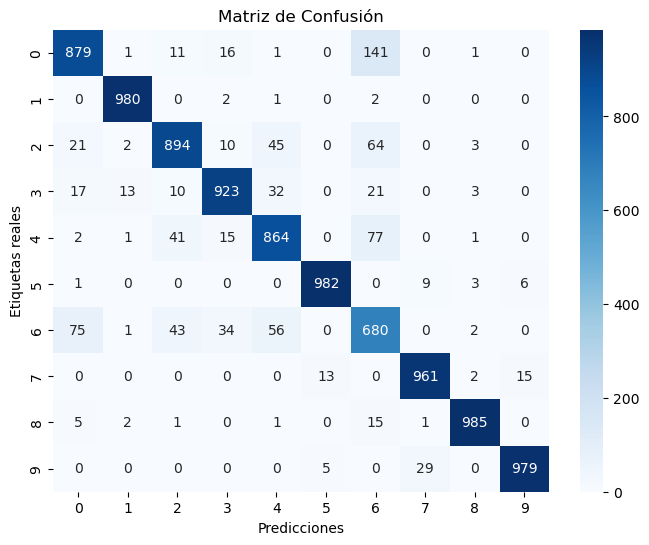

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_preds,y_test)
#cm=confusion_matrix(y_preds,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_preds), yticklabels=np.unique(y_preds))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.show()


In [42]:
y_probs_train = model.predict(x_train)

1875/1875 [==============================] - 6s 3ms/step


In [44]:
y_preds_train = y_probs_train.argmax(axis=1)

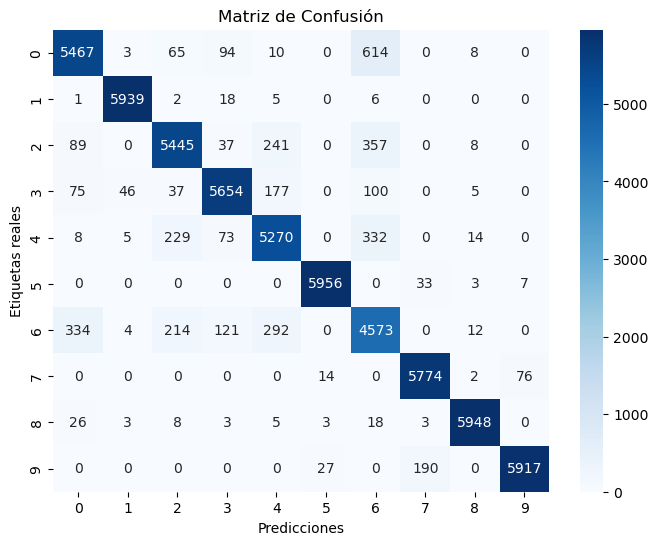

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_preds_train,y_train)
#cm=confusion_matrix(y_preds,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_preds), yticklabels=np.unique(y_preds))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.show()